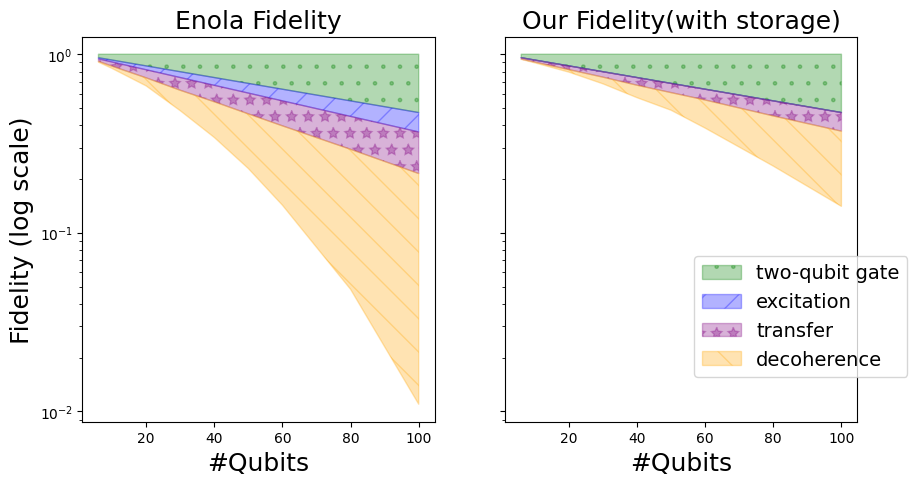

In [37]:
import matplotlib.pyplot as plt
import numpy as np

with open('data/qaoa_regular3_no_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    mvqc_transfer_duration = eval(file.readline()) 
    mvqc_move_duration_list = eval(file.readline()) 
    mvqc_cir_fidelity_list = eval(file.readline()) 
    mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    mvqc_cir_fidelity_coherence_list = eval(file.readline())
    mvqc_nmoves = eval(file.readline())

    enola_transfer_duration = eval(file.readline()) 
    enola_move_duration_list = eval(file.readline()) 
    enola_cir_fidelity_list = eval(file.readline()) 
    enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    enola_cir_fidelity_coherence_list = eval(file.readline())
    enola_nmoves = eval(file.readline())

with open('data/qaoa_regular3_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    storage_transfer_duration = eval(file.readline()) 
    storage_move_duration_list = eval(file.readline()) 
    storage_cir_fidelity_list = eval(file.readline()) 
    storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    storage_cir_fidelity_coherence_list = eval(file.readline())
    storage_nmoves = eval(file.readline())

from matplotlib.ticker import LogLocator, FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

enola_fidelity_2q_gate_list = enola_cir_fidelity_2q_gate_list
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3, label = 'two-qubit gate')

enola_fidelity_2q_gate_for_idle_list = np.multiply(enola_cir_fidelity_2q_gate_list, enola_cir_fidelity_2q_gate_for_idle_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_for_idle_list, enola_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3, label = 'excitation')

enola_fidelity_transfer_list = np.multiply(enola_fidelity_2q_gate_for_idle_list, enola_cir_fidelity_atom_transfer_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_transfer_list, enola_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3, label = 'transfer')

enola_fidelity_decoherence_list = np.multiply(enola_fidelity_transfer_list, enola_cir_fidelity_coherence_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_decoherence_list, enola_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3, label = 'decoherence')

ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))
# # ax1.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=3)) 
# def log_format(y, pos):
#     return f'{y:.2f}'

# ax1.yaxis.set_major_formatter(FuncFormatter(log_format))
ax1.set_title('Enola Fidelity', fontsize = 18)
ax1.set_ylabel('Fidelity (log scale)', fontsize = 18)
ax1.set_xlabel('#Qubits', fontsize = 18)
storage_fidelity_2q_gate_list = storage_cir_fidelity_2q_gate_list
ax2.fill_between(N_Qubit_List, storage_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

storage_fidelity_2q_gate_for_idle_list = np.multiply(storage_cir_fidelity_2q_gate_list, storage_cir_fidelity_2q_gate_for_idle_list)
ax2.fill_between(N_Qubit_List, storage_fidelity_2q_gate_for_idle_list, storage_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

storage_fidelity_transfer_list = np.multiply(storage_fidelity_2q_gate_for_idle_list, storage_cir_fidelity_atom_transfer_list)
ax2.fill_between(N_Qubit_List, storage_fidelity_transfer_list, storage_fidelity_2q_gate_list, hatch = '*', color='purple', alpha = 0.3)

storage_fidelity_decoherence_list = np.multiply(storage_fidelity_transfer_list, storage_cir_fidelity_coherence_list)
ax2.fill_between(N_Qubit_List, storage_fidelity_decoherence_list, storage_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)

ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax2.set_title('Our Fidelity(with storage)', fontsize = 18)

ax2.set_xlabel('#Qubits', fontsize = 18)

fig.legend(fontsize = 14, loc="lower right", bbox_to_anchor=(0.95, 0.2), borderaxespad=0.)
plt.savefig("fig/FidelityIntro.pdf",  bbox_inches='tight')
plt.show()

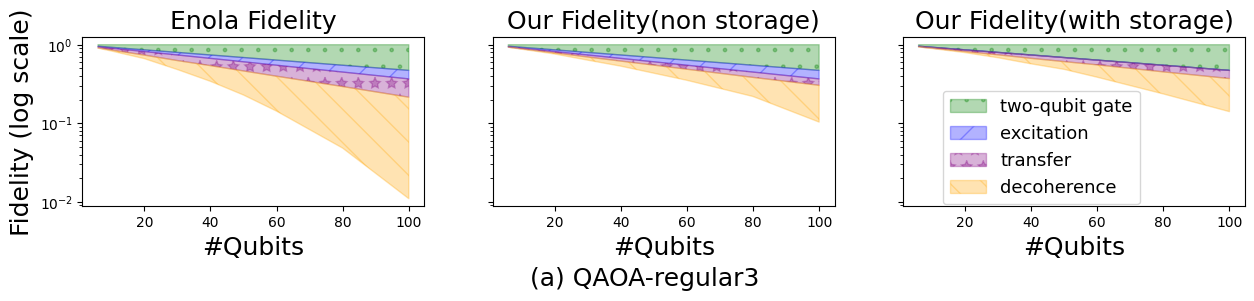

In [17]:
import matplotlib.pyplot as plt
import numpy as np

with open('data/qaoa_regular3_no_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    mvqc_transfer_duration = eval(file.readline()) 
    mvqc_move_duration_list = eval(file.readline()) 
    mvqc_cir_fidelity_list = eval(file.readline()) 
    mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    mvqc_cir_fidelity_coherence_list = eval(file.readline())
    mvqc_nmoves = eval(file.readline())

    enola_transfer_duration = eval(file.readline()) 
    enola_move_duration_list = eval(file.readline()) 
    enola_cir_fidelity_list = eval(file.readline()) 
    enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    enola_cir_fidelity_coherence_list = eval(file.readline())
    enola_nmoves = eval(file.readline())

with open('data/qaoa_regular3_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    storage_transfer_duration = eval(file.readline()) 
    storage_move_duration_list = eval(file.readline()) 
    storage_cir_fidelity_list = eval(file.readline()) 
    storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    storage_cir_fidelity_coherence_list = eval(file.readline())
    storage_nmoves = eval(file.readline())

from matplotlib.ticker import LogLocator, FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 2.2))

enola_fidelity_2q_gate_list = enola_cir_fidelity_2q_gate_list
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3, label = 'two-qubit gate')

enola_fidelity_2q_gate_for_idle_list = np.multiply(enola_cir_fidelity_2q_gate_list, enola_cir_fidelity_2q_gate_for_idle_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_for_idle_list, enola_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3, label = 'excitation')

enola_fidelity_transfer_list = np.multiply(enola_fidelity_2q_gate_for_idle_list, enola_cir_fidelity_atom_transfer_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_transfer_list, enola_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3, label = 'transfer')

enola_fidelity_decoherence_list = np.multiply(enola_fidelity_transfer_list, enola_cir_fidelity_coherence_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_decoherence_list, enola_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3, label = 'decoherence')

ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))
# # ax1.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=3)) 
# def log_format(y, pos):
#     return f'{y:.2f}'

# ax1.yaxis.set_major_formatter(FuncFormatter(log_format))
ax1.set_title('Enola Fidelity', fontsize = 18)
ax1.set_ylabel('Fidelity (log scale)', fontsize = 18)
ax1.set_xlabel('#Qubits', fontsize = 18)

mvqc_fidelity_2q_gate_list = mvqc_cir_fidelity_2q_gate_list
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

mvqc_fidelity_2q_gate_for_idle_list = np.multiply(mvqc_cir_fidelity_2q_gate_list, mvqc_cir_fidelity_2q_gate_for_idle_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_for_idle_list, mvqc_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

mvqc_fidelity_transfer_list = np.multiply(mvqc_fidelity_2q_gate_for_idle_list, mvqc_cir_fidelity_atom_transfer_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_transfer_list, mvqc_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

mvqc_fidelity_decoherence_list = np.multiply(mvqc_fidelity_transfer_list, mvqc_cir_fidelity_coherence_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_decoherence_list, mvqc_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)

ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax2.set_title('Our Fidelity(non storage)', fontsize = 18)

ax2.set_xlabel('#Qubits', fontsize = 18)

storage_fidelity_2q_gate_list = storage_cir_fidelity_2q_gate_list
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

storage_fidelity_2q_gate_for_idle_list = np.multiply(storage_cir_fidelity_2q_gate_list, storage_cir_fidelity_2q_gate_for_idle_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_for_idle_list, storage_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

storage_fidelity_transfer_list = np.multiply(storage_fidelity_2q_gate_for_idle_list, storage_cir_fidelity_atom_transfer_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_transfer_list, storage_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

storage_fidelity_decoherence_list = np.multiply(storage_fidelity_transfer_list, storage_cir_fidelity_coherence_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_decoherence_list, storage_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)


ax3.set_yscale('log')
ax3.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax3.set_title('Our Fidelity(with storage)', fontsize = 18)

ax3.set_xlabel('#Qubits', fontsize = 18)
plt.figtext(0.5, -0.22, '(a) QAOA-regular3', ha='center', va='center', fontsize=18)
fig.legend(fontsize = 13, loc="lower right", bbox_to_anchor=(0.83, 0.12), borderaxespad=0.)
plt.savefig("fig/qaoa-regular3.pdf",  bbox_inches='tight')
plt.show()

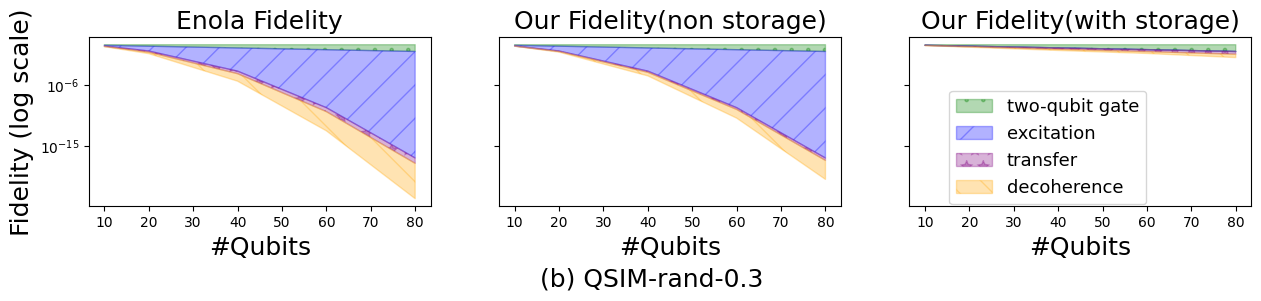

In [9]:
import matplotlib.pyplot as plt
import numpy as np

with open('data/qsim_rand_0.3_no_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    mvqc_transfer_duration = eval(file.readline()) 
    mvqc_move_duration_list = eval(file.readline()) 
    mvqc_cir_fidelity_list = eval(file.readline()) 
    mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    mvqc_cir_fidelity_coherence_list = eval(file.readline())
    mvqc_nmoves = eval(file.readline())

    enola_transfer_duration = eval(file.readline()) 
    enola_move_duration_list = eval(file.readline()) 
    enola_cir_fidelity_list = eval(file.readline()) 
    enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    enola_cir_fidelity_coherence_list = eval(file.readline())
    enola_nmoves = eval(file.readline())

with open('data/qsim_rand_0.3_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    storage_transfer_duration = eval(file.readline()) 
    storage_move_duration_list = eval(file.readline()) 
    storage_cir_fidelity_list = eval(file.readline()) 
    storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    storage_cir_fidelity_coherence_list = eval(file.readline())
    storage_nmoves = eval(file.readline())

from matplotlib.ticker import LogLocator, FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 2.2))

enola_fidelity_2q_gate_list = enola_cir_fidelity_2q_gate_list
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3, label = 'two-qubit gate')

enola_fidelity_2q_gate_for_idle_list = np.multiply(enola_cir_fidelity_2q_gate_list, enola_cir_fidelity_2q_gate_for_idle_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_for_idle_list, enola_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3, label = 'excitation')

enola_fidelity_transfer_list = np.multiply(enola_fidelity_2q_gate_for_idle_list, enola_cir_fidelity_atom_transfer_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_transfer_list, enola_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3, label = 'transfer')

enola_fidelity_decoherence_list = np.multiply(enola_fidelity_transfer_list, enola_cir_fidelity_coherence_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_decoherence_list, enola_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3, label = 'decoherence')

ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))
# # ax1.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=3)) 
# def log_format(y, pos):
#     return f'{y:.2f}'

# ax1.yaxis.set_major_formatter(FuncFormatter(log_format))
ax1.set_title('Enola Fidelity', fontsize = 18)
ax1.set_ylabel('Fidelity (log scale)', fontsize = 18)
ax1.set_xlabel('#Qubits', fontsize = 18)

mvqc_fidelity_2q_gate_list = mvqc_cir_fidelity_2q_gate_list
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

mvqc_fidelity_2q_gate_for_idle_list = np.multiply(mvqc_cir_fidelity_2q_gate_list, mvqc_cir_fidelity_2q_gate_for_idle_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_for_idle_list, mvqc_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

mvqc_fidelity_transfer_list = np.multiply(mvqc_fidelity_2q_gate_for_idle_list, mvqc_cir_fidelity_atom_transfer_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_transfer_list, mvqc_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

mvqc_fidelity_decoherence_list = np.multiply(mvqc_fidelity_transfer_list, mvqc_cir_fidelity_coherence_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_decoherence_list, mvqc_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)

ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax2.set_title('Our Fidelity(non storage)', fontsize = 18)

ax2.set_xlabel('#Qubits', fontsize = 18)

storage_fidelity_2q_gate_list = storage_cir_fidelity_2q_gate_list
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

storage_fidelity_2q_gate_for_idle_list = np.multiply(storage_cir_fidelity_2q_gate_list, storage_cir_fidelity_2q_gate_for_idle_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_for_idle_list, storage_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

storage_fidelity_transfer_list = np.multiply(storage_fidelity_2q_gate_for_idle_list, storage_cir_fidelity_atom_transfer_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_transfer_list, storage_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

storage_fidelity_decoherence_list = np.multiply(storage_fidelity_transfer_list, storage_cir_fidelity_coherence_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_decoherence_list, storage_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)


ax3.set_yscale('log')
ax3.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))
plt.figtext(0.5, -0.22, '(b) QSIM-rand-0.3', ha='center', va='center', fontsize=18)
ax3.set_title('Our Fidelity(with storage)', fontsize = 18)

ax3.set_xlabel('#Qubits', fontsize = 18)

fig.legend(fontsize = 13, loc="lower right", bbox_to_anchor=(0.83, 0.12), borderaxespad=0.)
plt.savefig("fig/qsim_rand_0.3.pdf",  bbox_inches='tight')
plt.show()

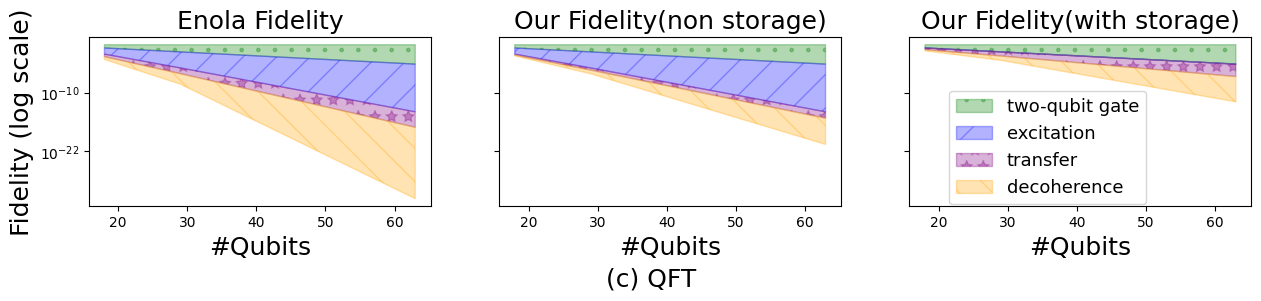

In [10]:
import matplotlib.pyplot as plt
import numpy as np

with open('data/qft_no_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    mvqc_transfer_duration = eval(file.readline()) 
    mvqc_move_duration_list = eval(file.readline()) 
    mvqc_cir_fidelity_list = eval(file.readline()) 
    mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    mvqc_cir_fidelity_coherence_list = eval(file.readline())
    mvqc_nmoves = eval(file.readline())

    enola_transfer_duration = eval(file.readline()) 
    enola_move_duration_list = eval(file.readline()) 
    enola_cir_fidelity_list = eval(file.readline()) 
    enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    enola_cir_fidelity_coherence_list = eval(file.readline())
    enola_nmoves = eval(file.readline())

with open('data/qft_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    storage_transfer_duration = eval(file.readline()) 
    storage_move_duration_list = eval(file.readline()) 
    storage_cir_fidelity_list = eval(file.readline()) 
    storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    storage_cir_fidelity_coherence_list = eval(file.readline())
    storage_nmoves = eval(file.readline())

from matplotlib.ticker import LogLocator, FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 2.2))

enola_fidelity_2q_gate_list = enola_cir_fidelity_2q_gate_list
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3, label = 'two-qubit gate')

enola_fidelity_2q_gate_for_idle_list = np.multiply(enola_cir_fidelity_2q_gate_list, enola_cir_fidelity_2q_gate_for_idle_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_for_idle_list, enola_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3, label = 'excitation')

enola_fidelity_transfer_list = np.multiply(enola_fidelity_2q_gate_for_idle_list, enola_cir_fidelity_atom_transfer_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_transfer_list, enola_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3, label = 'transfer')

enola_fidelity_decoherence_list = np.multiply(enola_fidelity_transfer_list, enola_cir_fidelity_coherence_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_decoherence_list, enola_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3, label = 'decoherence')

ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))
# # ax1.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=3)) 
# def log_format(y, pos):
#     return f'{y:.2f}'

# ax1.yaxis.set_major_formatter(FuncFormatter(log_format))
ax1.set_title('Enola Fidelity', fontsize = 18)
ax1.set_ylabel('Fidelity (log scale)', fontsize = 18)
ax1.set_xlabel('#Qubits', fontsize = 18)

mvqc_fidelity_2q_gate_list = mvqc_cir_fidelity_2q_gate_list
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

mvqc_fidelity_2q_gate_for_idle_list = np.multiply(mvqc_cir_fidelity_2q_gate_list, mvqc_cir_fidelity_2q_gate_for_idle_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_for_idle_list, mvqc_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

mvqc_fidelity_transfer_list = np.multiply(mvqc_fidelity_2q_gate_for_idle_list, mvqc_cir_fidelity_atom_transfer_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_transfer_list, mvqc_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

mvqc_fidelity_decoherence_list = np.multiply(mvqc_fidelity_transfer_list, mvqc_cir_fidelity_coherence_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_decoherence_list, mvqc_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)

ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax2.set_title('Our Fidelity(non storage)', fontsize = 18)

ax2.set_xlabel('#Qubits', fontsize = 18)

storage_fidelity_2q_gate_list = storage_cir_fidelity_2q_gate_list
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

storage_fidelity_2q_gate_for_idle_list = np.multiply(storage_cir_fidelity_2q_gate_list, storage_cir_fidelity_2q_gate_for_idle_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_for_idle_list, storage_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

storage_fidelity_transfer_list = np.multiply(storage_fidelity_2q_gate_for_idle_list, storage_cir_fidelity_atom_transfer_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_transfer_list, storage_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

storage_fidelity_decoherence_list = np.multiply(storage_fidelity_transfer_list, storage_cir_fidelity_coherence_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_decoherence_list, storage_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)


ax3.set_yscale('log')
ax3.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax3.set_title('Our Fidelity(with storage)', fontsize = 18)

ax3.set_xlabel('#Qubits', fontsize = 18)
plt.figtext(0.5, -0.22, '(c) QFT', ha='center', va='center', fontsize=18)
fig.legend(fontsize = 13, loc="lower right", bbox_to_anchor=(0.83, 0.12), borderaxespad=0.)
plt.savefig("fig/qft.pdf",  bbox_inches='tight')
plt.show()

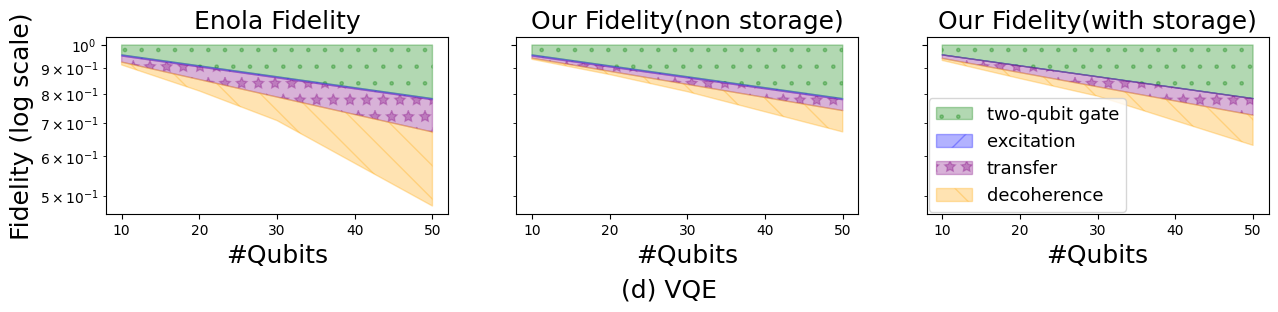

In [14]:
import matplotlib.pyplot as plt
import numpy as np

with open('data/vqe_no_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    mvqc_transfer_duration = eval(file.readline()) 
    mvqc_move_duration_list = eval(file.readline()) 
    mvqc_cir_fidelity_list = eval(file.readline()) 
    mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    mvqc_cir_fidelity_coherence_list = eval(file.readline())
    mvqc_nmoves = eval(file.readline())

    enola_transfer_duration = eval(file.readline()) 
    enola_move_duration_list = eval(file.readline()) 
    enola_cir_fidelity_list = eval(file.readline()) 
    enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    enola_cir_fidelity_coherence_list = eval(file.readline())
    enola_nmoves = eval(file.readline())

with open('data/vqe_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    storage_transfer_duration = eval(file.readline()) 
    storage_move_duration_list = eval(file.readline()) 
    storage_cir_fidelity_list = eval(file.readline()) 
    storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    storage_cir_fidelity_coherence_list = eval(file.readline())
    storage_nmoves = eval(file.readline())

from matplotlib.ticker import LogLocator, FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 2.3))

enola_fidelity_2q_gate_list = enola_cir_fidelity_2q_gate_list
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3, label = 'two-qubit gate')

enola_fidelity_2q_gate_for_idle_list = np.multiply(enola_cir_fidelity_2q_gate_list, enola_cir_fidelity_2q_gate_for_idle_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_for_idle_list, enola_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3, label = 'excitation')

enola_fidelity_transfer_list = np.multiply(enola_fidelity_2q_gate_for_idle_list, enola_cir_fidelity_atom_transfer_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_transfer_list, enola_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3, label = 'transfer')

enola_fidelity_decoherence_list = np.multiply(enola_fidelity_transfer_list, enola_cir_fidelity_coherence_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_decoherence_list, enola_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3, label = 'decoherence')

ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=1))
# # ax1.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=1)) 
# def log_format(y, pos):
#     return f'{y:.2f}'

# ax1.yaxis.set_major_formatter(FuncFormatter(log_format))
ax1.set_title('Enola Fidelity', fontsize = 18)
ax1.set_ylabel('Fidelity (log scale)', fontsize = 18)
ax1.set_xlabel('#Qubits', fontsize = 18)

mvqc_fidelity_2q_gate_list = mvqc_cir_fidelity_2q_gate_list
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

mvqc_fidelity_2q_gate_for_idle_list = np.multiply(mvqc_cir_fidelity_2q_gate_list, mvqc_cir_fidelity_2q_gate_for_idle_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_for_idle_list, mvqc_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

mvqc_fidelity_transfer_list = np.multiply(mvqc_fidelity_2q_gate_for_idle_list, mvqc_cir_fidelity_atom_transfer_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_transfer_list, mvqc_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

mvqc_fidelity_decoherence_list = np.multiply(mvqc_fidelity_transfer_list, mvqc_cir_fidelity_coherence_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_decoherence_list, mvqc_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)

ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=1))

ax2.set_title('Our Fidelity(non storage)', fontsize = 18)

ax2.set_xlabel('#Qubits', fontsize = 18)

storage_fidelity_2q_gate_list = storage_cir_fidelity_2q_gate_list
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

storage_fidelity_2q_gate_for_idle_list = np.multiply(storage_cir_fidelity_2q_gate_list, storage_cir_fidelity_2q_gate_for_idle_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_for_idle_list, storage_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

storage_fidelity_transfer_list = np.multiply(storage_fidelity_2q_gate_for_idle_list, storage_cir_fidelity_atom_transfer_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_transfer_list, storage_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

storage_fidelity_decoherence_list = np.multiply(storage_fidelity_transfer_list, storage_cir_fidelity_coherence_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_decoherence_list, storage_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)


ax3.set_yscale('log')
ax3.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=1))

ax3.set_title('Our Fidelity(with storage)', fontsize = 18)

ax3.set_xlabel('#Qubits', fontsize = 18)
plt.figtext(0.5, -0.22, '(d) VQE', ha='center', va='center', fontsize=18)
fig.legend(fontsize = 13, loc="lower right", bbox_to_anchor=(0.805, 0.12), borderaxespad=0.)

plt.savefig("fig/vqe.pdf",  bbox_inches='tight')
plt.show()

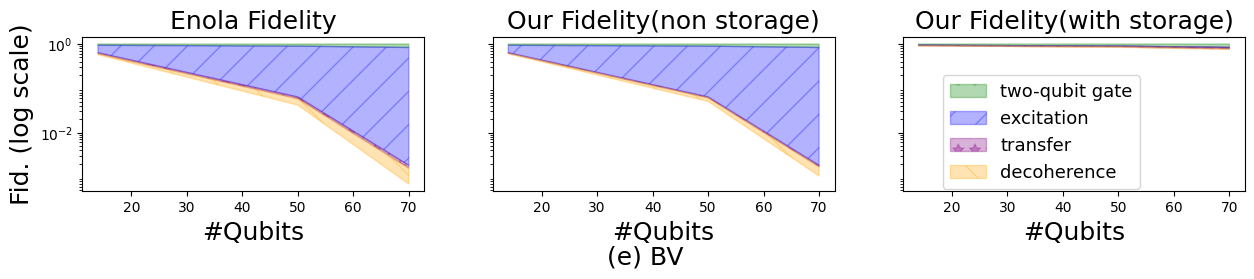

In [15]:
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = ['Times New Roman']

with open('data/bv_no_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    mvqc_transfer_duration = eval(file.readline()) 
    mvqc_move_duration_list = eval(file.readline()) 
    mvqc_cir_fidelity_list = eval(file.readline()) 
    mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
    mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    mvqc_cir_fidelity_coherence_list = eval(file.readline())
    mvqc_nmoves = eval(file.readline())

    enola_transfer_duration = eval(file.readline()) 
    enola_move_duration_list = eval(file.readline()) 
    enola_cir_fidelity_list = eval(file.readline()) 
    enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
    enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    enola_cir_fidelity_coherence_list = eval(file.readline())
    enola_nmoves = eval(file.readline())

with open('data/bv_storage_compare.txt', 'r') as file:
    N_Qubit_List = eval(file.readline())
    storage_transfer_duration = eval(file.readline()) 
    storage_move_duration_list = eval(file.readline()) 
    storage_cir_fidelity_list = eval(file.readline()) 
    storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
    storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
    storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
    storage_cir_fidelity_coherence_list = eval(file.readline())
    storage_nmoves = eval(file.readline())

from matplotlib.ticker import LogLocator, FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 2))

enola_fidelity_2q_gate_list = enola_cir_fidelity_2q_gate_list
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3, label = 'two-qubit gate')

enola_fidelity_2q_gate_for_idle_list = np.multiply(enola_cir_fidelity_2q_gate_list, enola_cir_fidelity_2q_gate_for_idle_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_2q_gate_for_idle_list, enola_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3, label = 'excitation')

enola_fidelity_transfer_list = np.multiply(enola_fidelity_2q_gate_for_idle_list, enola_cir_fidelity_atom_transfer_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_transfer_list, enola_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3, label = 'transfer')

enola_fidelity_decoherence_list = np.multiply(enola_fidelity_transfer_list, enola_cir_fidelity_coherence_list)
ax1.fill_between(N_Qubit_List, enola_fidelity_decoherence_list, enola_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3, label = 'decoherence')

ax1.set_yscale('log')
ax1.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))
# # ax1.yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=3)) 
# def log_format(y, pos):
#     return f'{y:.2f}'

# ax1.yaxis.set_major_formatter(FuncFormatter(log_format))
ax1.set_title('Enola Fidelity', fontsize = 18)
ax1.set_ylabel('Fid. (log scale)', fontsize = 18)
ax1.set_xlabel('#Qubits', fontsize = 18)

mvqc_fidelity_2q_gate_list = mvqc_cir_fidelity_2q_gate_list
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

mvqc_fidelity_2q_gate_for_idle_list = np.multiply(mvqc_cir_fidelity_2q_gate_list, mvqc_cir_fidelity_2q_gate_for_idle_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_2q_gate_for_idle_list, mvqc_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

mvqc_fidelity_transfer_list = np.multiply(mvqc_fidelity_2q_gate_for_idle_list, mvqc_cir_fidelity_atom_transfer_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_transfer_list, mvqc_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

mvqc_fidelity_decoherence_list = np.multiply(mvqc_fidelity_transfer_list, mvqc_cir_fidelity_coherence_list)
ax2.fill_between(N_Qubit_List, mvqc_fidelity_decoherence_list, mvqc_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)

ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax2.set_title('Our Fidelity(non storage)', fontsize = 18)

ax2.set_xlabel('#Qubits', fontsize = 18)

storage_fidelity_2q_gate_list = storage_cir_fidelity_2q_gate_list
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_list, 1, color='green', hatch = '.', alpha = 0.3)

storage_fidelity_2q_gate_for_idle_list = np.multiply(storage_cir_fidelity_2q_gate_list, storage_cir_fidelity_2q_gate_for_idle_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_2q_gate_for_idle_list, storage_fidelity_2q_gate_list, hatch = '/', color='blue', alpha = 0.3)

storage_fidelity_transfer_list = np.multiply(storage_fidelity_2q_gate_for_idle_list, storage_cir_fidelity_atom_transfer_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_transfer_list, storage_fidelity_2q_gate_for_idle_list, hatch = '*', color='purple', alpha = 0.3)

storage_fidelity_decoherence_list = np.multiply(storage_fidelity_transfer_list, storage_cir_fidelity_coherence_list)
ax3.fill_between(N_Qubit_List, storage_fidelity_decoherence_list, storage_fidelity_transfer_list, hatch = '\\', color='orange', alpha = 0.3)

ax3.set_yscale('log')
ax3.yaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0], numticks=3))

ax3.set_title('Our Fidelity(with storage)', fontsize = 18)

ax3.set_xlabel('#Qubits', fontsize = 18)

fig.legend(fontsize = 13, loc="lower right", bbox_to_anchor=(0.83, 0.12), borderaxespad=0.)
plt.figtext(0.5, -0.22, '(e) BV', ha='center', va='center', fontsize=18)
# plt.subplots_adjust(top=0.9, bottom=0.2)
plt.savefig("fig/bv.pdf",  bbox_inches='tight')

plt.show()
# plt.figure()
# plt.savefig("fig/blank.pdf",  bbox_inches='tight')

In [43]:
from tabulate import tabulate

def format_number(num, decimal_places):
    formatted_number = f"{num:,.{decimal_places}f}"
    return formatted_number

headers = ["Benchmark Name", "Enola Fidelity", "PowerMove Fidelity", 'Fidelity Improv.', 'Enola Exe. Time(us)', 'PowerMove Exe. Time(us)', 'Exe. Time Improv.']

data = []

tags = ['qaoa_regular3', 'qaoa_regular4', 'qaoa_random', 'qft', 'bv', 'vqe', 'qsim_rand_0.3']
for tag in tags:
    with open('data/' + tag + "_no_storage_compare.txt", 'r') as file:
        N_Qubit_List = eval(file.readline())
        mvqc_transfer_duration_list = eval(file.readline()) 
        mvqc_move_duration_list = eval(file.readline()) 
        mvqc_cir_fidelity_list = eval(file.readline()) 
        mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
        mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
        mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
        mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
        mvqc_cir_fidelity_coherence_list = eval(file.readline())
        mvqc_nmoves = eval(file.readline())

        enola_transfer_duration_list = eval(file.readline()) 
        enola_move_duration_list = eval(file.readline()) 
        enola_cir_fidelity_list = eval(file.readline()) 
        enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
        enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
        enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
        enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
        enola_cir_fidelity_coherence_list = eval(file.readline())
        enola_nmoves = eval(file.readline())
    with open('data/' + tag + "_storage_compare.txt", 'r') as file:
        file.readline()
        storage_transfer_duration_list = eval(file.readline()) 
        storage_move_duration_list = eval(file.readline()) 
        storage_cir_fidelity_list = eval(file.readline()) 
        storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
        storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
        storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
        storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
        storage_cir_fidelity_coherence_list = eval(file.readline())
        storage_nmoves = eval(file.readline())

    for n, f1, f2, mt1, mt2, tt1, tt2 in zip(N_Qubit_List, storage_cir_fidelity_list, enola_cir_fidelity_list, storage_move_duration_list, enola_move_duration_list, storage_transfer_duration_list, enola_transfer_duration_list):
        data.append([])
        data[-1].append(tag + '_' + str(n))
        data[-1].append(f2)
        data[-1].append(f1)
        data[-1].append(f1 / f2)
        data[-1].append(mt2 + tt2)
        data[-1].append(mt1 + tt1)
        data[-1].append((mt2 + tt2) / (mt1 + tt1))       
        tag_separate = tag.split('_')
        if len(tag_separate) > 1:
            new_tag = tag_separate[0].upper() + '-' + tag_separate[1]
        else:
            new_tag = tag.upper()
        print(new_tag + "-" + str(n),"&", format_number(f2, 2), "&", format_number(f1, 2), "&", format_number(f1 / f2, 2),"&", format_number(mt2 + tt2, 2), "&", format_number(mt1 + tt1, 2), "&", round((mt2 + tt2) / (mt1 + tt1), 2), "\\\\")
        print("\\hline")
table = tabulate(data, headers, tablefmt="grid")
print(table)


QAOA-regular3-6 & 0.90 & 0.94 & 1.04 & 2,626.83 & 1,691.69 & 1.55 \\
\hline
QAOA-regular3-10 & 0.83 & 0.89 & 1.08 & 4,533.67 & 2,294.72 & 1.98 \\
\hline
QAOA-regular3-20 & 0.66 & 0.79 & 1.19 & 7,862.39 & 3,374.46 & 2.33 \\
\hline
QAOA-regular3-30 & 0.48 & 0.68 & 1.41 & 13,198.04 & 6,116.19 & 2.16 \\
\hline
QAOA-regular3-40 & 0.34 & 0.57 & 1.67 & 17,249.38 & 8,998.75 & 1.92 \\
\hline
QAOA-regular3-50 & 0.23 & 0.49 & 2.12 & 21,087.88 & 9,582.99 & 2.2 \\
\hline
QAOA-regular3-60 & 0.14 & 0.39 & 2.70 & 25,449.73 & 12,440.46 & 2.05 \\
\hline
QAOA-regular3-80 & 0.05 & 0.24 & 4.90 & 33,553.14 & 17,746.76 & 1.89 \\
\hline
QAOA-regular3-100 & 0.01 & 0.14 & 12.82 & 44,038.42 & 21,710.11 & 2.03 \\
\hline
QAOA-regular4-6 & 0.87 & 0.92 & 1.05 & 4,000.93 & 2,471.48 & 1.62 \\
\hline
QAOA-regular4-10 & 0.79 & 0.86 & 1.09 & 5,932.00 & 3,926.17 & 1.51 \\
\hline
QAOA-regular4-20 & 0.57 & 0.70 & 1.23 & 11,986.12 & 8,719.49 & 1.37 \\
\hline
QAOA-regular4-30 & 0.40 & 0.56 & 1.42 & 16,450.23 & 12,127.03 & 1.3

In [44]:
headers = ["Benchmark Name", "Non-Storage Fidelity", "With-Storage Fidelity", 'Fidelity Improv.', 'Non-Storage Exe. Time(us)', 'With-Storage Exe. Time(us)', 'Exe. Time Overhead']
tags = ['qaoa_regular3', 'qaoa_regular4', 'qaoa_random', 'qft', 'bv', 'vqe', 'qsim_rand_0.3']

for tag in tags:
    with open('data/' + tag + "_no_storage_compare.txt", 'r') as file:
        N_Qubit_List = eval(file.readline())
        mvqc_transfer_duration_list = eval(file.readline()) 
        mvqc_move_duration_list = eval(file.readline()) 
        mvqc_cir_fidelity_list = eval(file.readline()) 
        mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
        mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
        mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
        mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
        mvqc_cir_fidelity_coherence_list = eval(file.readline())
        mvqc_nmoves = eval(file.readline())

        enola_transfer_duration_list = eval(file.readline()) 
        enola_move_duration_list = eval(file.readline()) 
        enola_cir_fidelity_list = eval(file.readline()) 
        enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
        enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
        enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
        enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
        enola_cir_fidelity_coherence_list = eval(file.readline())
        enola_nmoves = eval(file.readline())
    with open('data/' + tag + "_storage_compare.txt", 'r') as file:
        file.readline()
        storage_transfer_duration_list = eval(file.readline()) 
        storage_move_duration_list = eval(file.readline()) 
        storage_cir_fidelity_list = eval(file.readline()) 
        storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
        storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
        storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
        storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
        storage_cir_fidelity_coherence_list = eval(file.readline())
        storage_nmoves = eval(file.readline())

    for n, f2, f1, mt2, mt1, tt2, tt1 in zip(N_Qubit_List, mvqc_cir_fidelity_list, storage_cir_fidelity_list, mvqc_move_duration_list, storage_move_duration_list, mvqc_transfer_duration_list, storage_transfer_duration_list):
        data.append([])
        data[-1].append(tag + '_' + str(n))
        data[-1].append(f2)
        data[-1].append(f1)
        data[-1].append((f1 - f2) / f2)
        data[-1].append(mt2 + tt2)
        data[-1].append(mt1 + tt1)
        data[-1].append((mt1 + tt1 - mt2 - tt2) / (mt2 + tt2))       
        tag_separate = tag.split('_')
        if len(tag_separate) > 1:
            new_tag = tag_separate[0].upper() + '-' + tag_separate[1]
        else:
            new_tag = tag.upper()
        print(new_tag + "-" + str(n),"&", format_number(f2, 2), "&", format_number(f1, 2), "&", format_number((f1 - f2) / f2, 2),"&", format_number(mt2 + tt2, 2), "&", format_number(mt1 + tt1, 2), "&", round((mt1 + tt1 - mt2 - tt2) / (mt2 + tt2), 2), "\\\\")
        print("\\hline")
table = tabulate(data, headers, tablefmt="grid")
print(table)


QAOA-regular3-6 & 0.93 & 0.94 & 0.01 & 1,040.88 & 1,691.69 & 0.63 \\
\hline
QAOA-regular3-10 & 0.88 & 0.89 & 0.02 & 1,917.03 & 2,294.72 & 0.2 \\
\hline
QAOA-regular3-20 & 0.76 & 0.79 & 0.04 & 2,587.68 & 3,374.46 & 0.3 \\
\hline
QAOA-regular3-30 & 0.64 & 0.68 & 0.07 & 4,680.72 & 6,116.19 & 0.31 \\
\hline
QAOA-regular3-40 & 0.53 & 0.57 & 0.07 & 5,601.12 & 8,998.75 & 0.61 \\
\hline
QAOA-regular3-50 & 0.43 & 0.49 & 0.12 & 7,135.26 & 9,582.99 & 0.34 \\
\hline
QAOA-regular3-60 & 0.35 & 0.39 & 0.09 & 8,134.16 & 12,440.46 & 0.53 \\
\hline
QAOA-regular3-80 & 0.22 & 0.24 & 0.08 & 10,490.10 & 17,746.76 & 0.69 \\
\hline
QAOA-regular3-100 & 0.10 & 0.14 & 0.36 & 16,122.96 & 21,710.11 & 0.35 \\
\hline
QAOA-regular4-6 & 0.91 & 0.92 & 0.01 & 1,001.02 & 2,471.48 & 1.47 \\
\hline
QAOA-regular4-10 & 0.85 & 0.86 & 0.02 & 2,324.33 & 3,926.17 & 0.69 \\
\hline
QAOA-regular4-20 & 0.69 & 0.70 & 0.01 & 4,714.41 & 8,719.49 & 0.85 \\
\hline
QAOA-regular4-30 & 0.56 & 0.56 & -0.00 & 6,056.05 & 12,127.03 & 1.0 \\
\hl

{'qaoa_random_10': (18, 0.6316522253839193), 'qaoa_random_20': (58, 0.05146236062140876), 'qaoa_random_30': (134, 2.9507207585539775e-05), 'qaoa_random_50': (297, 1.2401632458032479e-17), 'qaoa_regular5_40': (52, 0.004799259883938661), 'qaoa_regular6_100': (132, 2.308360741184343e-15), 'qsim_rand_0.3_20': (76, 0.020657772760485443), 'qsim_rand_0.3_40': (173, 1.8863273543728438e-08), 'bv_50': (22, 0.06111922703116108), 'bv_70': (36, 0.001656602331758818)}
dict_keys(['qaoa_random_10', 'qaoa_random_20', 'qaoa_random_30', 'qaoa_random_50', 'qaoa_regular5_40', 'qaoa_regular6_100', 'qsim_rand_0.3_20', 'qsim_rand_0.3_40', 'bv_50', 'bv_70'])
{'qaoa_regular5_40': (43, 0.4016001767756789), 'qaoa_regular6_100': (100, 0.019808963620875038), 'qaoa_random_10': (14, 0.8526348892285992), 'qaoa_random_20': (47, 0.49074299675549377), 'qaoa_random_30': (90, 0.19691961149471196), 'qaoa_random_50': (239, 0.003347173680271988), 'bv_50': (22, 0.8481834520819352), 'bv_70': (36, 0.7635869092045787), 'qsim_rand

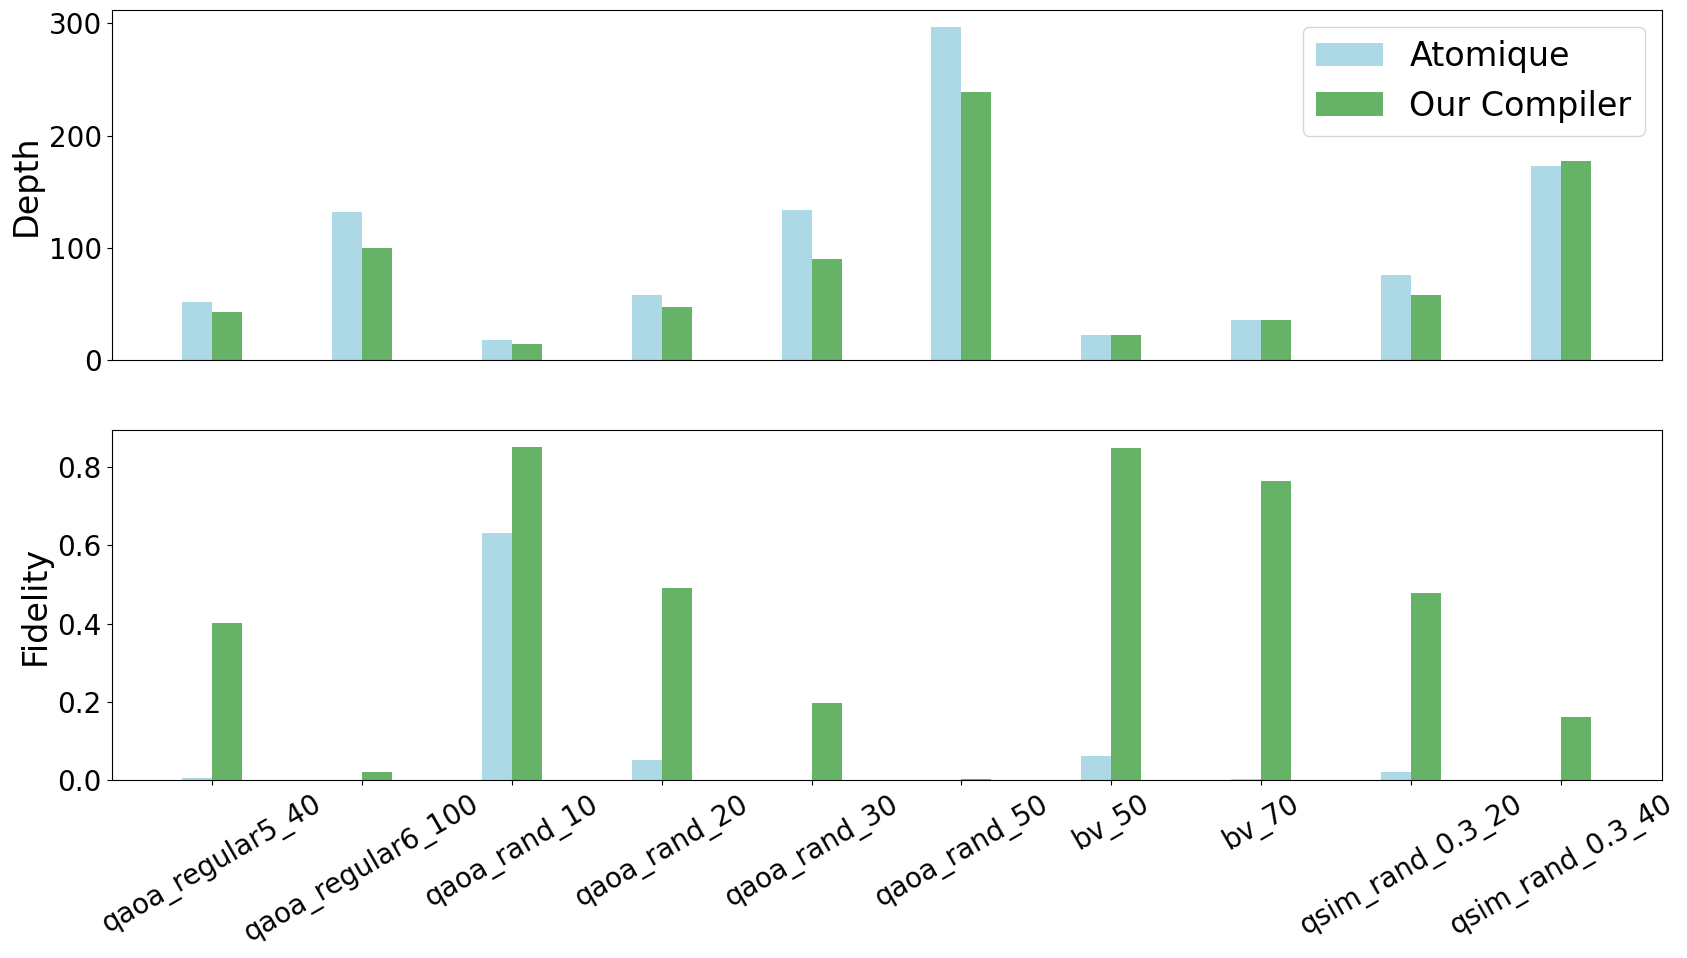

In [2]:
atomique_data = {}
with open("data/atomique_data.txt", 'r') as file:
    benchmark_data = file.readline().split(' ')
    while len(benchmark_data) > 1:
        atomique_data[benchmark_data[0]] = (eval(benchmark_data[1]), eval(benchmark_data[2]))
        benchmark_data = file.readline().split(' ')
print(atomique_data)

mvqc_data = {}
tags = ['qaoa_regular5', 'qaoa_regular6', 'qaoa_random', 'bv', 'qsim_rand_0.3']
for tag in tags:
    with open('data/' + tag + "_storage_compare_multi_aod.txt", 'r') as file:
        NAOD_list = eval(file.readline())
        for i in NAOD_list:
            if i == 2:
                N_Qubit_List = eval(file.readline())
                mvqc_transfer_duration_list = eval(file.readline()) 
                mvqc_move_duration_list = eval(file.readline()) 
                mvqc_cir_fidelity_list = eval(file.readline()) 
                mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
                mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
                mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
                mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
                mvqc_cir_fidelity_coherence_list = eval(file.readline())
                mvqc_nmoves = eval(file.readline())
                for i in range(len(N_Qubit_List)):
                    if tag + '_' + str(N_Qubit_List[i]) in atomique_data.keys():
                        mvqc_data[tag + '_' + str(N_Qubit_List[i])] = (mvqc_nmoves[i], mvqc_cir_fidelity_list[i])
            else:
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())
                eval(file.readline())

print(atomique_data.keys())
print(mvqc_data)

import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10)) 
categories = list(mvqc_data.keys())


data_list1 = []
data_list2 = []

for c in categories:
    data_list1.append(atomique_data[c][0])
    data_list2.append(mvqc_data[c][0])

for c in range(len(categories)):
    ca = categories[c].split('_')
    if len(ca) > 2:
        if ca[1] == 'random':
            categories[c] = ca[0] + '_' + 'rand_' + ca[2]
print(categories)
bar_width = 1
index = np.arange(len(categories)) * 5
ax1.bar(index, data_list1, bar_width, label='Atomique', color = 'lightblue')
ax1.bar(index + bar_width, data_list2, bar_width, label='Our Compiler', color = 'green', alpha = 0.6)

ax1.set_ylabel('Depth', fontsize = 24)
ax1.set_xticks([])
ax1.legend(fontsize = 24)

# 显示图表
categories = list(mvqc_data.keys())

data_list1 = []
data_list2 = []

for c in categories:
    data_list1.append(atomique_data[c][1])
    data_list2.append(mvqc_data[c][1])

for c in range(len(categories)):
    ca = categories[c].split('_')
    if len(ca) > 2:
        if ca[1] == 'random':
            print(ca[1])
            categories[c] = ca[0] + '_' + 'rand_' + ca[2]
bar_width = 1
index = np.arange(len(categories)) * 5
ax2.bar(index, data_list1, bar_width, label='Atomique', color = 'lightblue')
ax2.bar(index + bar_width, data_list2, bar_width, label='Our Compiler', color = 'green', alpha = 0.6)

ax2.set_ylabel('Fidelity', fontsize = 24)
ax2.set_xticks(index + bar_width / 2, categories, fontsize = 20, rotation=30)  # 设置x轴标签

# 显示图表
ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig("fig/compared_to_atomique.pdf",  bbox_inches='tight')
plt.subplots_adjust(hspace=0.2) 

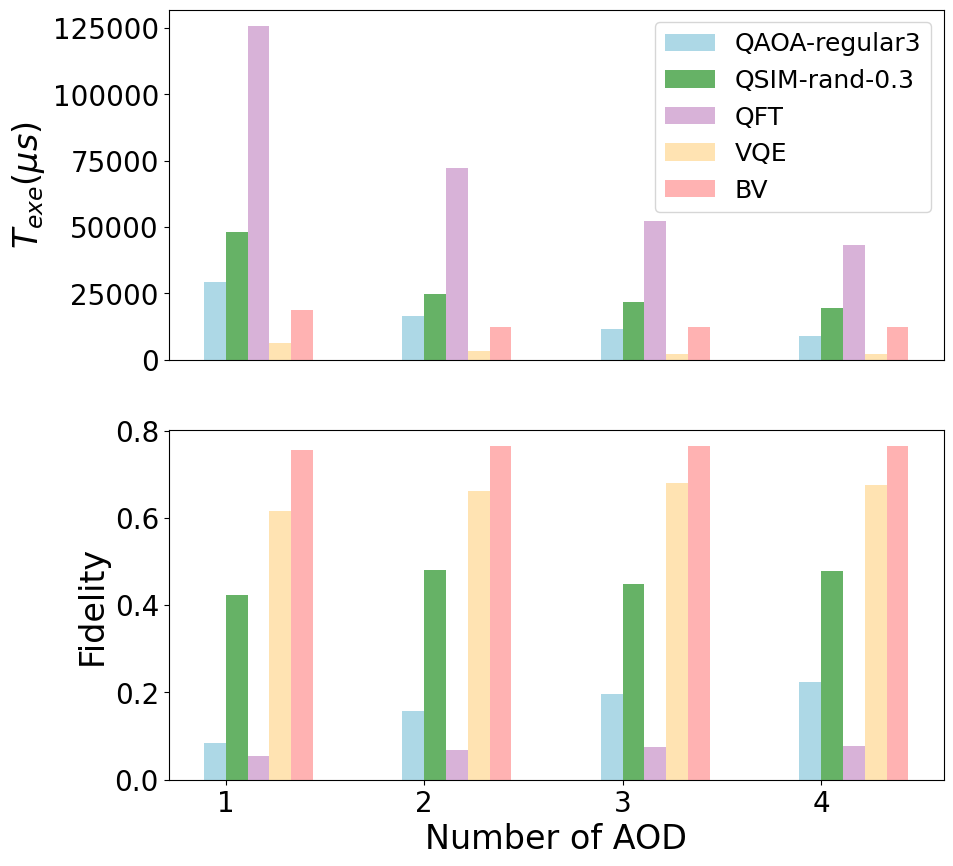

In [4]:
mvqc_data = {}
benchmark_tags = ['qaoa_regular3', 'qsim_rand_0.3', 'qft', 'vqe', 'bv']
tags = ['qaoa_regular3_100', 'qsim_rand_0.3_20', 'qft_18', 'vqe_50', 'bv_70']

for NAOD in NAOD_list:
    mvqc_data[NAOD] = {}
for tag in benchmark_tags:
    with open('data/' + tag + "_storage_compare_multi_aod.txt", 'r') as file:
        NAOD_list = eval(file.readline())
        for NAOD in NAOD_list:
            
            N_Qubit_List = eval(file.readline())
            mvqc_transfer_duration_list = eval(file.readline()) 
            mvqc_move_duration_list = eval(file.readline()) 
            mvqc_cir_fidelity_list = eval(file.readline()) 
            mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
            mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
            mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
            mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
            mvqc_cir_fidelity_coherence_list = eval(file.readline())
            mvqc_nmoves = eval(file.readline())
            for i in range(len(N_Qubit_List)):
                if tag + '_' + str(N_Qubit_List[i]) in tags:
                    mvqc_data[NAOD][tag + '_' + str(N_Qubit_List[i])] = (mvqc_move_duration_list[i] + mvqc_transfer_duration_list[i], mvqc_cir_fidelity_list[i])

import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10)) 
categories = NAOD_list

data_list = {}

for ti in range(len(tags)):
    data_list[ti] = []
    for c in categories:
        data_list[ti].append(mvqc_data[c][tags[ti]][0])

bar_width = 0.55
index = np.arange(len(categories)) * 5

ax1.bar(index, data_list[0], bar_width, label='QAOA-regular3', color = 'lightblue')
ax1.bar(index + bar_width, data_list[1], bar_width, label='QSIM-rand-0.3', color = 'green', alpha = 0.6)
ax1.bar(index + 2 * bar_width, data_list[2], bar_width, label='QFT', color = 'purple', alpha = 0.3)
ax1.bar(index + 3 * bar_width, data_list[3], bar_width, label='VQE', color = 'orange', alpha = 0.3)
ax1.bar(index + 4 * bar_width, data_list[4], bar_width, label='BV', color = 'red', alpha = 0.3)

ax1.set_ylabel(r'$T_{exe} (\mu s)$', fontsize = 24)
ax1.set_xticks([])
ax1.legend(fontsize = 18)

categories = NAOD_list

data_list = {}

for ti in range(len(tags)):
    data_list[ti] = []
    for c in categories:
        data_list[ti].append(mvqc_data[c][tags[ti]][1])

bar_width = 0.55
index = np.arange(len(categories)) * 5
ax2.bar(index, data_list[0], bar_width, label='QAOA-regular3', color = 'lightblue')
ax2.bar(index + bar_width, data_list[1], bar_width, label='QSIM-rand-0.3', color = 'green', alpha = 0.6)
ax2.bar(index + 2 * bar_width, data_list[2], bar_width, label='QFT', color = 'purple', alpha = 0.3)
ax2.bar(index + 3 * bar_width, data_list[3], bar_width, label='VQE', color = 'orange', alpha = 0.3)
ax2.bar(index + 4 * bar_width, data_list[4], bar_width, label='BV', color = 'red', alpha = 0.3)

ax2.set_xlabel('Number of AOD', fontsize = 24)
ax2.set_ylabel('Fidelity', fontsize = 24)
ax2.set_xticks(index + bar_width / 2, categories, fontsize = 20)  # 设置x轴标签

ax1.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig("fig/multi_aod.pdf",  bbox_inches='tight')
plt.subplots_adjust(hspace=0.2) 

In [3]:
from tabulate import tabulate

def format_number(num, decimal_places):
    formatted_number = f"{num:,.{decimal_places}f}"
    return formatted_number

headers = ["Benchmark Name", "Enola Fidelity", "PowerMove Fidelity", 'Fidelity Improv.', 'Enola Exe. Time(us)', 'PowerMove Exe. Time(us)', 'Exe. Time Improv.']

data = []

tags = ['qaoa_regular3', 'qaoa_regular4', 'qaoa_random', 'qft', 'bv', 'vqe', 'qsim_rand_0.3']
index = 0
improv = 0
zone_improv = 0
for tag in tags:
    with open('data/' + tag + "_no_storage_compare.txt", 'r') as file:
        N_Qubit_List = eval(file.readline())
        mvqc_transfer_duration_list = eval(file.readline()) 
        mvqc_move_duration_list = eval(file.readline()) 
        mvqc_cir_fidelity_list = eval(file.readline()) 
        mvqc_cir_fidelity_1q_gate_list = eval(file.readline()) 
        mvqc_cir_fidelity_2q_gate_list = eval(file.readline()) 
        mvqc_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
        mvqc_cir_fidelity_atom_transfer_list = eval(file.readline()) 
        mvqc_cir_fidelity_coherence_list = eval(file.readline())
        mvqc_nmoves = eval(file.readline())

        enola_transfer_duration_list = eval(file.readline()) 
        enola_move_duration_list = eval(file.readline()) 
        enola_cir_fidelity_list = eval(file.readline()) 
        enola_cir_fidelity_1q_gate_list = eval(file.readline()) 
        enola_cir_fidelity_2q_gate_list = eval(file.readline()) 
        enola_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
        enola_cir_fidelity_atom_transfer_list = eval(file.readline()) 
        enola_cir_fidelity_coherence_list = eval(file.readline())
        enola_nmoves = eval(file.readline())
    with open('data/' + tag + "_storage_compare.txt", 'r') as file:
        file.readline()
        storage_transfer_duration_list = eval(file.readline()) 
        storage_move_duration_list = eval(file.readline()) 
        storage_cir_fidelity_list = eval(file.readline()) 
        storage_cir_fidelity_1q_gate_list = eval(file.readline()) 
        storage_cir_fidelity_2q_gate_list = eval(file.readline()) 
        storage_cir_fidelity_2q_gate_for_idle_list = eval(file.readline()) 
        storage_cir_fidelity_atom_transfer_list = eval(file.readline()) 
        storage_cir_fidelity_coherence_list = eval(file.readline())
        storage_nmoves = eval(file.readline())

    for n, non_f1, f1, f2, non_mt1, mt1, mt2, non_tt1, tt1, tt2 in zip(N_Qubit_List, mvqc_cir_fidelity_list, storage_cir_fidelity_list, enola_cir_fidelity_list, mvqc_move_duration_list, storage_move_duration_list, enola_move_duration_list, mvqc_transfer_duration_list, storage_transfer_duration_list, enola_transfer_duration_list):
        data.append([])
        data[-1].append(tag + '_' + str(n))
        data[-1].append(f2)
        data[-1].append(non_f1)
        data[-1].append(f1)
        data[-1].append(f1 / f2)
        data[-1].append(mt2 + tt2)
        data[-1].append(non_mt1 + non_tt1)
        data[-1].append(mt1 + tt1)
        data[-1].append((mt2 + tt2) / (non_mt1 + non_tt1))       
        tag_separate = tag.split('_')
        if tag == 'qaoa_regular3' and n in [30, 40, 50, 60, 80, 100]:
            zone_improv = zone_improv + f1 / non_f1
            improv = improv + (non_f1 / f2)
            index += 1
        elif tag == 'qaoa_regular4' and n in [30, 40, 50, 60, 80]:
            zone_improv = zone_improv + f1 / non_f1
            improv = improv + (non_f1 / f2)
            index += 1
        elif tag == 'qaoa_random' and n in [20, 30]:
            zone_improv = zone_improv + f1 / non_f1
            improv = improv + (non_f1 / f2)
            index += 1
        elif tag == 'qft' and n in [18, 29]:
            zone_improv = zone_improv + f1 / non_f1
            improv = improv + (non_f1 / f2)
            index += 1
        elif tag == 'vqe' and n in [30, 50]:
            zone_improv = zone_improv + f1 / non_f1
            improv = improv + (non_f1 / f2)
            index += 1
        elif tag == 'bv' and n in [14, 50, 70]:
            zone_improv = zone_improv + f1 / non_f1
            improv = improv + (non_f1 / f2)
            index += 1
        elif tag == 'qsim_rand_0.3' and n in [10, 20, 40]:
            zone_improv = zone_improv + f1 / non_f1
            improv = improv + (non_f1 / f2)
            index += 1
        if len(tag_separate) > 1:
            new_tag = tag_separate[0].upper() + '-' + tag_separate[1]
        else:
            new_tag = tag.upper()
        print(new_tag + "-" + str(n),"&", format_number(f2, 2), "&", format_number(non_f1, 2), "&", format_number(f1, 2), "&", format_number(f1 / f2, 2),"&", format_number(mt2 + tt2, 2), "&", format_number(non_mt1 + non_tt1, 2), "&", format_number(mt1 + tt1, 2), "&", round((mt2 + tt2) / (non_mt1 + non_tt1), 2), "\\\\")
        print("\\hline")
table = tabulate(data, headers, tablefmt="grid")
print(table)
print(improv / index)
print(zone_improv / index)

QAOA-regular3-6 & 0.90 & 0.93 & 0.94 & 1.04 & 2,626.83 & 1,040.88 & 1,691.69 & 2.52 \\
\hline
QAOA-regular3-10 & 0.83 & 0.88 & 0.89 & 1.08 & 4,533.67 & 1,917.03 & 2,294.72 & 2.36 \\
\hline
QAOA-regular3-20 & 0.66 & 0.76 & 0.79 & 1.19 & 7,862.39 & 2,587.68 & 3,374.46 & 3.04 \\
\hline
QAOA-regular3-30 & 0.48 & 0.64 & 0.68 & 1.41 & 13,198.04 & 4,680.72 & 6,116.19 & 2.82 \\
\hline
QAOA-regular3-40 & 0.34 & 0.53 & 0.57 & 1.67 & 17,249.38 & 5,601.12 & 8,998.75 & 3.08 \\
\hline
QAOA-regular3-50 & 0.23 & 0.43 & 0.49 & 2.12 & 21,087.88 & 7,135.26 & 9,582.99 & 2.96 \\
\hline
QAOA-regular3-60 & 0.14 & 0.35 & 0.39 & 2.70 & 25,449.73 & 8,134.16 & 12,440.46 & 3.13 \\
\hline
QAOA-regular3-80 & 0.05 & 0.22 & 0.24 & 4.90 & 33,553.14 & 10,490.10 & 17,746.76 & 3.2 \\
\hline
QAOA-regular3-100 & 0.01 & 0.10 & 0.14 & 12.82 & 44,038.42 & 16,122.96 & 21,710.11 & 2.73 \\
\hline
QAOA-regular4-6 & 0.87 & 0.91 & 0.92 & 1.05 & 4,000.93 & 1,001.02 & 2,471.48 & 4.0 \\
\hline
QAOA-regular4-10 & 0.79 & 0.85 & 0.86 & 1

random
random
random
random
random


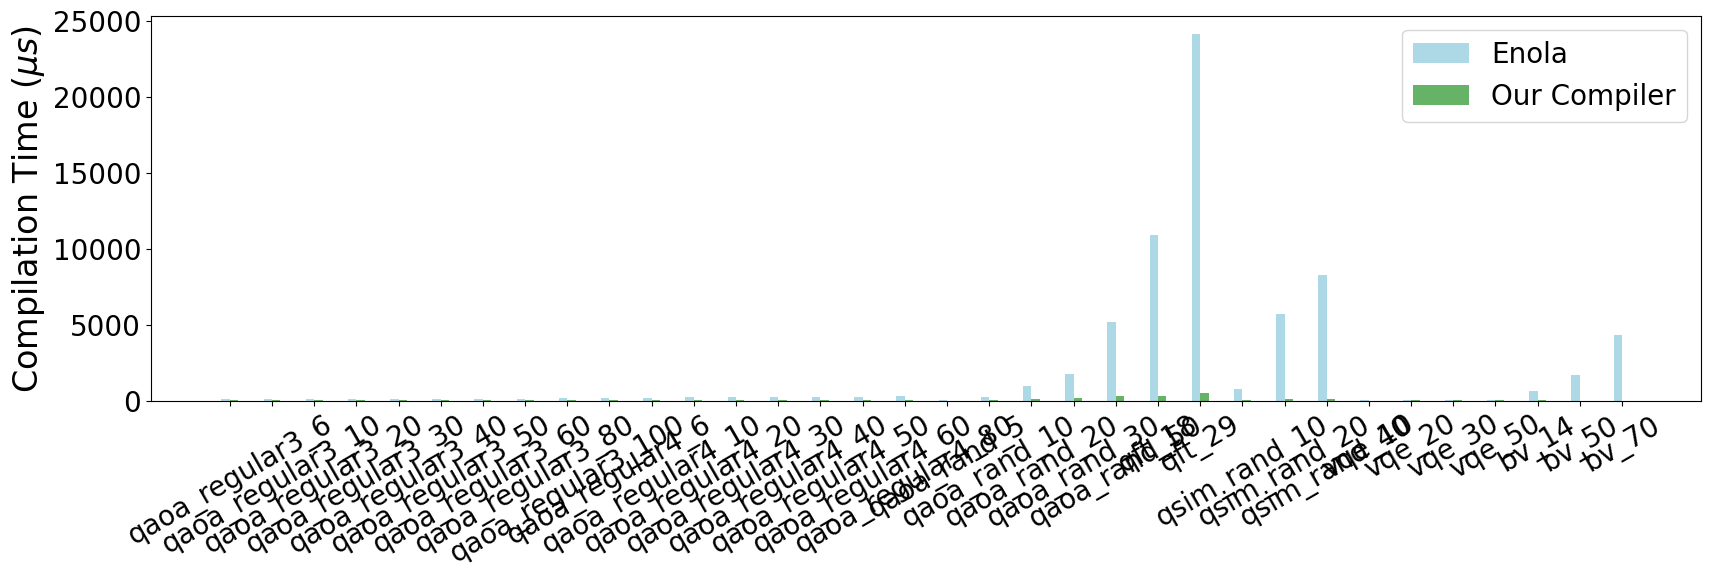

In [5]:
import matplotlib.pyplot as plt
import numpy as np
N_Qubit_List = {}
mvqc_runtime_list = {}
enola_runtime_list = {}
tags = ['qaoa_regular3', 'qaoa_regular4', 'qaoa_random', 'qft', 'qsim_rand', 'vqe', 'bv']
with open("data/runtime_compare.txt", 'r') as file:
    for tag in tags:    
        file.readline()
        N_Qubit_List[tag] = eval(file.readline())
        mvqc_runtime_list[tag] = eval(file.readline())
        enola_runtime_list[tag] = eval(file.readline())
        file.readline()

fig, (ax2) = plt.subplots(1, 1, figsize=(20, 5)) 

categories = []
data_list1 = []
data_list2 = []
for tag in tags:
    # if tag == 'qaoa_regular3':
    #     continue
    for i in range(len(N_Qubit_List[tag])):
        # if i > 2:
        #     break
        categories.append(tag + '_' + str(N_Qubit_List[tag][i]))
        data_list1.append(enola_runtime_list[tag][i])
        data_list2.append(mvqc_runtime_list[tag][i])

for c in range(len(categories)):
    ca = categories[c].split('_')
    if len(ca) > 2:
        if ca[1] == 'random':
            print(ca[1])
            categories[c] = ca[0] + '_' + 'rand_' + ca[2]

bar_width = 1
index = np.arange(len(categories)) * 5
ax2.bar(index, data_list1, bar_width, label='Enola', color = 'lightblue')
ax2.bar(index + bar_width, data_list2, bar_width, label='Our Compiler', color = 'green', alpha = 0.6)

ax2.set_ylabel(r'Compilation Time ($\mu s$)', fontsize = 24)
ax2.set_xticks(index + bar_width / 2, categories, fontsize = 20, rotation=30)  # 设置x轴标签


ax2.tick_params(axis='y', labelsize=20)
plt.legend(fontsize = 20)
plt.savefig("fig/runtime.pdf",  bbox_inches='tight')
plt.subplots_adjust(hspace=0.2) 

In [6]:
from tabulate import tabulate

def format_number(num, decimal_places):
    formatted_number = f"{num:,.{decimal_places}f}"
    return formatted_number

headers = ["Benchmark Name", "Enola Comp. Time", "PowerMove Comp. Time", 'Comp. Time Improv.']

data = []

for c, ect, pct in zip(categories, data_list1, data_list2):
    data.append([])
    data[-1].append(c)
    data[-1].append(ect)
    data[-1].append(pct)
    data[-1].append(ect / pct)       
    tag_separate = c.split('_')
    if len(tag_separate) > 2:
        new_tag = tag_separate[0].upper() + '-' + tag_separate[1] + '-' + tag_separate[2]
    else:
        new_tag = tag_separate[0].upper() + '-' + tag_separate[1]

    print(new_tag, "&", format_number(ect, 2), "&", format_number(pct, 2), "&", format_number(ect / pct, 2), "\\\\")
    print("\\hline")
table = tabulate(data, headers, tablefmt="grid")
print(table)

QAOA-regular3-6 & 109.14 & 35.09 & 3.11 \\
\hline
QAOA-regular3-10 & 111.35 & 36.46 & 3.05 \\
\hline
QAOA-regular3-20 & 123.43 & 40.42 & 3.05 \\
\hline
QAOA-regular3-30 & 128.33 & 41.33 & 3.10 \\
\hline
QAOA-regular3-40 & 144.70 & 41.50 & 3.49 \\
\hline
QAOA-regular3-50 & 142.30 & 41.49 & 3.43 \\
\hline
QAOA-regular3-60 & 140.64 & 44.62 & 3.15 \\
\hline
QAOA-regular3-80 & 145.91 & 45.38 & 3.22 \\
\hline
QAOA-regular3-100 & 167.22 & 45.64 & 3.66 \\
\hline
QAOA-regular4-6 & 204.75 & 54.68 & 3.74 \\
\hline
QAOA-regular4-10 & 202.37 & 57.56 & 3.52 \\
\hline
QAOA-regular4-20 & 251.68 & 63.42 & 3.97 \\
\hline
QAOA-regular4-30 & 256.88 & 65.33 & 3.93 \\
\hline
QAOA-regular4-40 & 266.53 & 66.07 & 4.03 \\
\hline
QAOA-regular4-50 & 253.94 & 63.34 & 4.01 \\
\hline
QAOA-regular4-60 & 278.18 & 68.89 & 4.04 \\
\hline
QAOA-regular4-80 & 291.68 & 72.17 & 4.04 \\
\hline
QAOA-rand-5 & 55.13 & 26.52 & 2.08 \\
\hline
QAOA-rand-10 & 284.63 & 62.09 & 4.58 \\
\hline
QAOA-rand-20 & 960.37 & 136.03 & 7.06 \\
\